In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

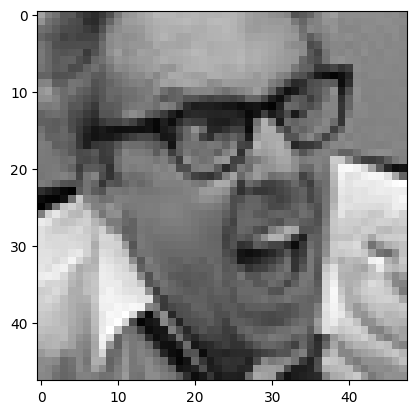

In [2]:
img=image.load_img(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\mood_classifier\train\angry\Training_3908.jpg")
plt.imshow(img)

In [3]:
i1=cv2.imread(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\mood_classifier\train\angry\Training_3908.jpg")
i1

array([[[163, 163, 163],
        [128, 128, 128],
        [114, 114, 114],
        ...,
        [139, 139, 139],
        [141, 141, 141],
        [134, 134, 134]],

       [[147, 147, 147],
        [114, 114, 114],
        [102, 102, 102],
        ...,
        [142, 142, 142],
        [138, 138, 138],
        [138, 138, 138]],

       [[112, 112, 112],
        [106, 106, 106],
        [ 92,  92,  92],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [134, 134, 134]],

       ...,

       [[139, 139, 139],
        [141, 141, 141],
        [136, 136, 136],
        ...,
        [154, 154, 154],
        [171, 171, 171],
        [191, 191, 191]],

       [[140, 140, 140],
        [133, 133, 133],
        [120, 120, 120],
        ...,
        [138, 138, 138],
        [146, 146, 146],
        [158, 158, 158]],

       [[136, 136, 136],
        [134, 134, 134],
        [113, 113, 113],
        ...,
        [146, 146, 146],
        [144, 144, 144],
        [144, 144, 144]]

In [4]:
i1.shape

(48, 48, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=train.flow_from_directory(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\mood_classifier\train",
                                     target_size=(48,48),
                                     color_mode="grayscale",
                                     class_mode="categorical",
                                     batch_size=64)

validation_data=validation.flow_from_directory(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\mood_classifier\validation",
                                               target_size=(48,48),
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               batch_size=64)

Found 28709 images belonging to 7 classes.
Found 693 images belonging to 7 classes.


In [8]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [9]:
train_data.classes

array([0, 0, 0, ..., 6, 6, 6])

In [11]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    BatchNormalization(),MaxPooling2D(2,2),Dropout(0.25),
    
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),MaxPooling2D(2,2),Dropout(0.25),
    
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),MaxPooling2D(2,2),Dropout(0.25),
    
    Flatten(),Dense(128,activation='relu'),Dropout(0.25),
    Dense(7,activation='softmax')
    ])

c:\Users\abhin\FSDS\Deep_Learning\dlenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_fit=model.fit(train_data,epochs=30)

Epoch 1/30


c:\Users\abhin\FSDS\Deep_Learning\dlenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


337/449 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 0.2260 - loss: 2.0675

KeyboardInterrupt: 